In [21]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import font_manager, rc

In [2]:
df=pd.read_excel('관서별 5대범죄 발생 및 검거.xlsx',encoding='utf-8')
df.head()


,관서명,소계(발생),소계(검거),살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거)
0,계,126401,82680,163,156,276,257,5449,5069,55307,21842,65206,55356
1,중부서,2860,1716,2,2,3,2,105,65,1395,477,1355,1170
2,종로서,2472,1589,3,3,6,5,115,98,1070,413,1278,1070
3,남대문서,2094,1226,1,0,6,4,65,46,1153,382,869,794
4,서대문서,4029,2579,2,2,5,4,154,124,1812,738,2056,1711


In [3]:
# 서울시 경찰청의 소속 구 @ https://goo.gl/MQSqXX
police_to_gu = {'서대문서': '서대문구', '수서서': '강남구', '강서서': '강서구', '서초서': '서초구',
                '서부서': '은평구', '중부서': '중구', '종로서': '종로구', '남대문서': '중구',
                '혜화서': '종로구', '용산서': '용산구', '성북서': '성북구', '동대문서': '동대문구',
                '마포서': '마포구', '영등포서': '영등포구', '성동서': '성동구', '동작서': '동작구',
                '광진서': '광진구', '강북서': '강북구', '금천서': '금천구', '중랑서': '중랑구',
                '강남서': '강남구', '관악서': '관악구', '강동서': '강동구', '종암서': '성북구', 
                '구로서': '구로구', '양천서': '양천구', '송파서': '송파구', '노원서': '노원구', 
                '방배서': '서초구', '은평서': '은평구', '도봉서': '도봉구'}

In [4]:
df['구별']=df['관서명'].apply(lambda x:police_to_gu.get(x, '구없음'))

In [5]:
df.head()

,관서명,소계(발생),소계(검거),살인(발생),살인(검거),강도(발생),강도(검거),강간(발생),강간(검거),절도(발생),절도(검거),폭력(발생),폭력(검거),구별
0,계,126401,82680,163,156,276,257,5449,5069,55307,21842,65206,55356,구없음
1,중부서,2860,1716,2,2,3,2,105,65,1395,477,1355,1170,중구
2,종로서,2472,1589,3,3,6,5,115,98,1070,413,1278,1070,종로구
3,남대문서,2094,1226,1,0,6,4,65,46,1153,382,869,794,중구
4,서대문서,4029,2579,2,2,5,4,154,124,1812,738,2056,1711,서대문구


In [6]:
gu_df=pd.pivot_table(df,index='구별', aggfunc=np.sum)
gu_df

,강간(검거),강간(발생),강도(검거),강도(발생),살인(검거),살인(발생),소계(검거),소계(발생),절도(검거),절도(발생),폭력(검거),폭력(발생)
구별,,,,,,,,,,,,
강남구,349,449,18,21,10,13,5732,8617,1650,3850,3705,4284
강동구,123,156,8,6,3,4,3171,5244,789,2366,2248,2712
강북구,126,153,13,14,8,7,3113,4257,618,1434,2348,2649
강서구,191,262,13,13,8,7,4190,5585,1260,2096,2718,3207
관악구,221,320,14,12,8,9,3712,6345,827,2706,2642,3298
광진구,220,240,26,14,4,4,3707,5909,1277,3026,2180,2625
구로구,164,281,11,15,6,8,3502,5646,889,2335,2432,3007
구없음,5069,5449,257,276,156,163,82680,126401,21842,55307,55356,65206
금천구,122,151,6,6,4,3,2796,3781,888,1567,1776,2054


In [8]:
gu_df.drop(['구없음'])
gu_df

,강간(검거),강간(발생),강도(검거),강도(발생),살인(검거),살인(발생),소계(검거),소계(발생),절도(검거),절도(발생),폭력(검거),폭력(발생)
구별,,,,,,,,,,,,
강남구,349,449,18,21,10,13,5732,8617,1650,3850,3705,4284
강동구,123,156,8,6,3,4,3171,5244,789,2366,2248,2712
강북구,126,153,13,14,8,7,3113,4257,618,1434,2348,2649
강서구,191,262,13,13,8,7,4190,5585,1260,2096,2718,3207
관악구,221,320,14,12,8,9,3712,6345,827,2706,2642,3298
광진구,220,240,26,14,4,4,3707,5909,1277,3026,2180,2625
구로구,164,281,11,15,6,8,3502,5646,889,2335,2432,3007
구없음,5069,5449,257,276,156,163,82680,126401,21842,55307,55356,65206
금천구,122,151,6,6,4,3,2796,3781,888,1567,1776,2054


In [9]:
gu_df['강간검거율'] = gu_df['강간(검거)']/gu_df['강간(발생)']*100
gu_df['강도검거율'] = gu_df['강도(검거)']/gu_df['강도(발생)']*100
gu_df['살인검거율'] = gu_df['살인(검거)']/gu_df['살인(발생)']*100
gu_df['절도검거율'] = gu_df['절도(검거)']/gu_df['절도(발생)']*100
gu_df['폭력검거율'] = gu_df['폭력(검거)']/gu_df['폭력(발생)']*100
gu_df['검거율'] = gu_df['소계(검거)']/gu_df['소계(발생)']*100
gu_df.head()

,강간(검거),강간(발생),강도(검거),강도(발생),살인(검거),살인(발생),소계(검거),소계(발생),절도(검거),절도(발생),폭력(검거),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,,,,,,,,
강남구,349,449,18,21,10,13,5732,8617,1650,3850,3705,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670
강동구,123,156,8,6,3,4,3171,5244,789,2366,2248,2712,78.846154,133.333333,75.000000,33.347422,82.890855,60.469108
강북구,126,153,13,14,8,7,3113,4257,618,1434,2348,2649,82.352941,92.857143,114.285714,43.096234,88.637222,73.126615
강서구,191,262,13,13,8,7,4190,5585,1260,2096,2718,3207,72.900763,100.000000,114.285714,60.114504,84.752105,75.022381
관악구,221,320,14,12,8,9,3712,6345,827,2706,2642,3298,69.062500,116.666667,88.888889,30.561715,80.109157,58.502758


In [10]:
del gu_df['강간(검거)']
del gu_df['강도(검거)']
del gu_df['살인(검거)']
del gu_df['절도(검거)']
del gu_df['폭력(검거)']
del gu_df['소계(발생)']
del gu_df['소계(검거)']

gu_df.head()

,강간(발생),강도(발생),살인(발생),절도(발생),폭력(발생),강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율
구별,,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670
강동구,156,6,4,2366,2712,78.846154,133.333333,75.000000,33.347422,82.890855,60.469108
강북구,153,14,7,1434,2649,82.352941,92.857143,114.285714,43.096234,88.637222,73.126615
강서구,262,13,7,2096,3207,72.900763,100.000000,114.285714,60.114504,84.752105,75.022381
관악구,320,12,9,2706,3298,69.062500,116.666667,88.888889,30.561715,80.109157,58.502758


In [11]:
gu_df[gu_df[['강간검거율', '강도검거율', '살인검거율', '절도검거율', '폭력검거율']]>100]=100

In [12]:
gu_df.rename(columns={'강간(발생)':'강간',
                        '강도(발생)':'강도',
                        '살인(발생)':'살인',
                        '절도(발생)':'절도',
                        '폭력(발생)':'폭력'}, inplace=True)

In [13]:
popul_df = pd.read_csv('pop_kor.csv',encoding='utf-8')
popul_df.head()

,구별,인구수
0,강남구,581760
1,강동구,463321
2,강북구,334426
3,강서구,595691
4,관악구,529031


In [14]:
gu_df = gu_df.join(popul_df)
gu_df.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,구별,인구수
구별,,,,,,,,,,,,,
강남구,449,21,13,3850,4284,77.728285,85.714286,76.923077,42.857143,86.484594,66.519670,NaN,NaN
강동구,156,6,4,2366,2712,78.846154,100.000000,75.000000,33.347422,82.890855,60.469108,NaN,NaN
강북구,153,14,7,1434,2649,82.352941,92.857143,100.000000,43.096234,88.637222,73.126615,NaN,NaN
강서구,262,13,7,2096,3207,72.900763,100.000000,100.000000,60.114504,84.752105,75.022381,NaN,NaN
관악구,320,12,9,2706,3298,69.062500,100.000000,88.888889,30.561715,80.109157,58.502758,NaN,NaN


In [15]:
gu_df.sort_values(by='검거율', ascending=False, inplace=True) # ascending=False : 내림차순, inplace=True : 덮어쓰기
gu_df.head()

,강간,강도,살인,절도,폭력,강간검거율,강도검거율,살인검거율,절도검거율,폭력검거율,검거율,구별,인구수
구별,,,,,,,,,,,,,
강서구,262,13,7,2096,3207,72.900763,100.000000,100.0,60.114504,84.752105,75.022381,NaN,NaN
금천구,151,6,3,1567,2054,80.794702,100.000000,100.0,56.668794,86.465433,73.948691,NaN,NaN
강북구,153,14,7,1434,2649,82.352941,92.857143,100.0,43.096234,88.637222,73.126615,NaN,NaN
도봉구,102,9,3,1063,1487,100.000000,100.000000,100.0,44.967074,87.626093,71.321321,NaN,NaN
동대문구,173,13,5,1981,2548,84.393064,100.000000,100.0,41.090358,87.401884,67.902542,NaN,NaN


/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51064 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-p

/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


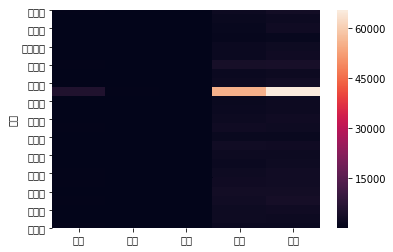

In [16]:
import seaborn as sns

sns.heatmap(gu_df[['강간', '강도', '살인', '절도', '폭력']])

In [18]:
weight_col = gu_df[['강간', '강도', '살인', '절도', '폭력']].max()
weight_col

강간     5449
강도      276
살인      163
절도    55307
폭력    65206
dtype: int64

In [19]:
crime_count_norm = gu_df[['강간', '강도', '살인', '절도', '폭력']] / weight_col
crime_count_norm

,강간,강도,살인,절도,폭력
구별,,,,,
강서구,0.048082,0.047101,0.042945,0.037898,0.049183
금천구,0.027712,0.021739,0.018405,0.028333,0.031500
강북구,0.028079,0.050725,0.042945,0.025928,0.040625
도봉구,0.018719,0.032609,0.018405,0.019220,0.022805
동대문구,0.031749,0.047101,0.030675,0.035818,0.039076
은평구,0.030464,0.032609,0.018405,0.034607,0.040686
강남구,0.082400,0.076087,0.079755,0.069611,0.065699
성북구,0.027528,0.018116,0.030675,0.032274,0.033877
중랑구,0.034318,0.039855,0.079755,0.038603,0.043662


In [22]:
%matplotlib inline 

font_name=font_manager.FontProperties(fname='Fonts/malgun.ttf').get_name()

rc('font',family=font_name)

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44053 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 49332 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 51064 missing from current font.
  font.

/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)


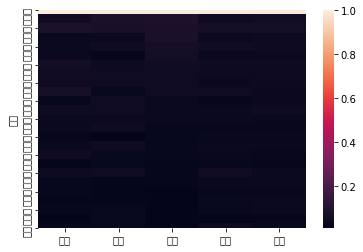

In [23]:
sns.heatmap(crime_count_norm.sort_values(by='살인', ascending=False)) # 내림차순으로 정렬하려면?


/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46321 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 46993 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 45432 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/chaeyoon/opt/anaconda3/lib/python3.7/site-p

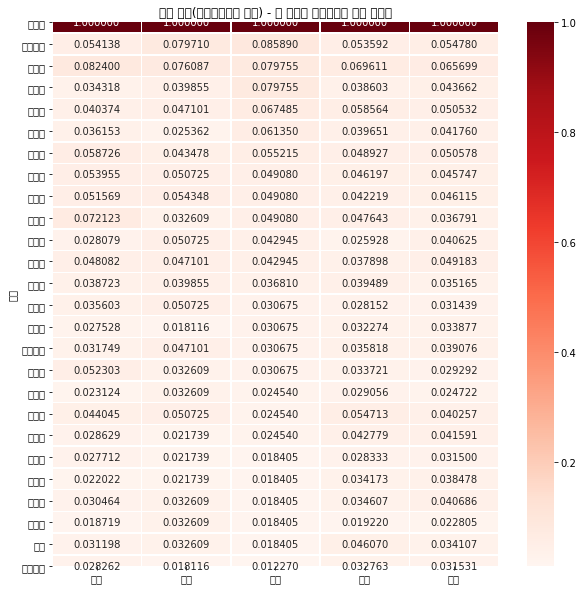

In [24]:
plt.figure(figsize = (10, 10))
sns.heatmap(crime_count_norm.sort_values(by='살인', ascending=False), annot=True, fmt='f', linewidths=.5, cmap='Reds')

plt.title('범죄 발생(살인발생으로 정렬) - 각 항목별 최대값으로 나눠 정규화')
plt.show()